# Carrega o dataset

In [40]:
import pandas as pd

dataset = pd.read_csv('dataset.csv')
dataset.head(20)

,sentence,category
0,"Auxílio-Doença Previdenciário, Benefícios em E...",orgão público
1,"PAGAR TODAS AS CONTAS EM ATRASO R$1.290,90.",finanças
2,Então encontraremos na próxima aula.,educação
3,Veja os resultados da categoria de ofertas do ...,indústrias
4,"Além disso, a embalagem é reutilizável e 100% ...","indústrias,varejo"
5,Na EAD Educação a distância você tem autonomia...,educação
6,Veja as condições de compra.,varejo
7,"Pensão por Morte (Art. 74/9), Benefícios em Es...",orgão público
8,A primeira agência foi aberta em 2 de janeiro ...,finanças
9,Valor das parcelas,"finanças,varejo"


# Agrupa por categoria

category
educação                    107
educação,finanças             2
educação,indústrias           5
educação,orgão público        9
finanças                     54
finanças,indústrias           3
finanças,orgão público        4
finanças,varejo              13
indústrias                   89
indústrias,orgão público      2
indústrias,varejo             7
orgão público               140
varejo                       85
varejo,indústrias             1
dtype: int64


<AxesSubplot: ylabel='Frequency'>

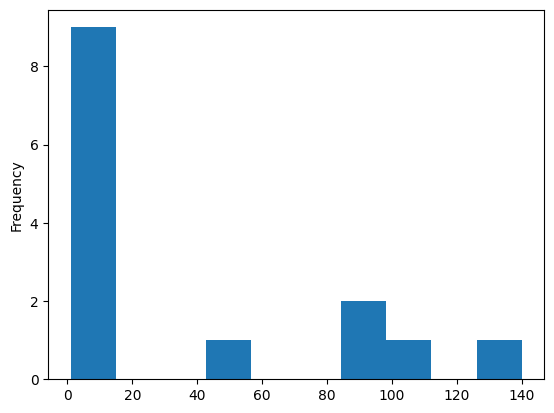

In [2]:
categorias = dataset.groupby('category').size()
print(categorias.head(20))
categorias.plot.hist()


# Conta elementos por categoria

                          sentence
category                          
educação                       107
educação,finanças                2
educação,indústrias              5
educação,orgão público           9
finanças                        54
finanças,indústrias              3
finanças,orgão público           4
finanças,varejo                 13
indústrias                      89
indústrias,orgão público         2
indústrias,varejo                7
orgão público                  140
varejo                          85
varejo,indústrias                1


<AxesSubplot: ylabel='Frequency'>

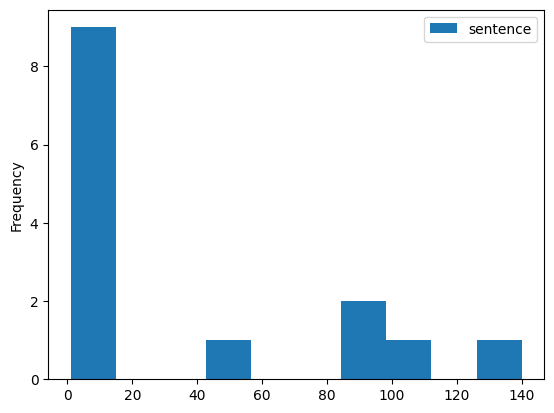

In [3]:
categorias_count = dataset.groupby('category').count()
print(categorias_count.head(20))
categorias_count.plot.hist()

# Padroniza as frases

In [4]:
def padroniza_frase(frase):
    frase = frase.lower()
    frase = frase.replace('-',' ')
    frase = "".join(c for c in frase if c.isalpha() or c==' ')
    outros_caracteres = ['ª','  ']
    for c in outros_caracteres:
        frase = frase.replace(c,' ')
    frase = frase.replace(' é ',' ser ')
    frase = frase.replace(' a ',' ')
    frase = frase.replace(' está ',' estar ')

def padroniza_dataset(df,col):
    df[col] = df[col].str.lower()
    df[col] = df[col].str.replace('-',' ')
    for i in range(df.shape[0]):        
        df.loc[i,'sentence'] = "".join(c for c in df.loc[i,'sentence'] if c.isalpha() or c==' ')
    outros_caracteres = ['ª','  ']
    for c in outros_caracteres:
        df[col] = df[col].str.replace(c,' ')
    df[col] = df[col].str.replace(' é ',' ser ')
    df[col] = df[col].str.replace(' a ',' ')
    df[col] = df[col].str.replace(' está ',' estar ')

padroniza_dataset(dataset,'sentence')
dataset.head(20)

,sentence,category
0,auxílio doença previdenciário benefícios em es...,orgão público
1,pagar todas as contas em atraso r,finanças
2,então encontraremos na próxima aula,educação
3,veja os resultados da categoria de ofertas do ...,indústrias
4,além disso embalagem ser reutilizável e recicl...,"indústrias,varejo"
5,na ead educação distância você tem autonomia p...,educação
6,veja as condições de compra,varejo
7,pensão por morte art benefícios em espécie dir...,orgão público
8,a primeira agência foi aberta em de janeiro de...,finanças
9,valor das parcelas,"finanças,varejo"


# Histograma de palavras mais frequentes

Tamanho do vocabulário: 1917
Vocabulário:  a abaixo abastecimento aberta abertas aberto abre absorvem acadêmico acadêmicos aceito aceitos acessar acesse acesso acessórios aché acima acionário acompanhamento acompanhar acompanhe acontece acordo activ adequada adicionado adicionados adicionais adicional adicionar adição administração adotadas adotiva adoção adquira advance adversos advogados aerossol afinal afirmativas agende agora agosto agradecemos agricultura agu aguarda aguarde agência ainda airbag airbags ajuda ajudar alcançamos alegre alerta alexandre algum alguma alguém alimentos alta alterar alto aluno alunos alvarás além ama ambiental ambiente ambientes americanas americano amigos aminoácidos amor amortecedores amplia ampliar analisa andamento andrade andré anhanguera animais aniversário ano anos ans anterior antes anti anticorrosão anticorrupção anton anual anuncia anunciado análise ao aos apartamento apenas aperfeiçoamento aplicação apoio aposentado aposentadoria apreensão apr

<AxesSubplot: ylabel='Frequency'>

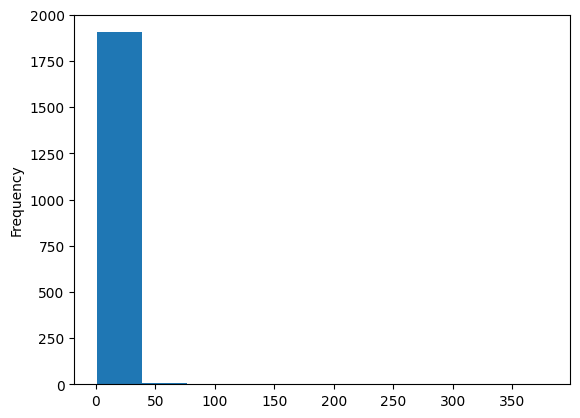

In [5]:
palavras = pd.DataFrame(" ".join(dataset['sentence']).split(),columns=['palavras'])
histograma = palavras.groupby('palavras').size()

vocab_size = histograma.index.shape[0]
print(f'Tamanho do vocabulário: {vocab_size}')
print('Vocabulário: ',' '.join(histograma.index))

print(histograma.shape)
histograma.plot.hist()


In [44]:
import numpy as np

a = np.unique(" ".join(dataset['sentence'].values).split())

In [77]:
import tensorflow as tf 
nomes = tf.strings.split(["samuel rocha","yasmin nascimento barros"])
t = tf.map_fn(lambda x: x.shape[0],nomes,fn_output_signature=tf.int32)
tf.convert_to_tensor(np.median(t))


<tf.Tensor: shape=(), dtype=float64, numpy=2.5>

In [6]:
words = " ".join(dataset['sentence'].values).split()
histograma = words.groupby('palavras').size()

vocab_size = histograma.index.shape[0]
print(f'Tamanho do vocabulário: {vocab_size}')

palavras
a                21
abaixo            3
abastecimento     1
aberta            1
abertas           4
                 ..
óleo              2
órgão             1
órgãos            1
últimas           1
único             1
Length: 1917, dtype: int64

# Conta palavras por frase

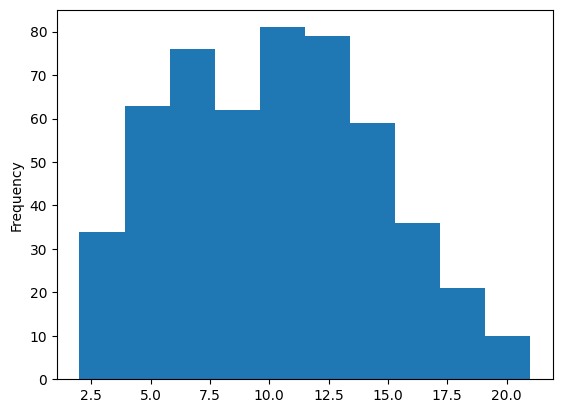

In [7]:
num_palavras = dataset['sentence'].str.split(' ').apply(len)

num_palavras.plot.hist()

max_palavras = int(num_palavras.max())
median_palvras = int(num_palavras.median())

In [8]:
median_palvras

10

# Categorias únicas

In [9]:
categorias = list(map(lambda x: x.split(','),dataset['category'].unique()))

categorias_unicas = " - ".join(dataset['category'].unique())
categorias_unicas = categorias_unicas.replace(',',' - ')
categorias_unicas = pd.unique(categorias_unicas.split(' - '))
categorias_unicas = pd.Series(range(len(categorias_unicas)),index=sorted(categorias_unicas))

num_categorias = categorias_unicas.shape[0]

print('Numero de categorias: ',num_categorias)


Numero de categorias:  5


In [10]:
categorias_unicas.shape[0]

5

In [11]:
import numpy as np

categorias_codificadas = np.zeros((dataset.shape[0],categorias_unicas.shape[0]))

for i in range(dataset.shape[0]):
    for label in dataset.loc[i,'category'].split(','):
        categorias_codificadas[i,categorias_unicas[label]] = 1
        
categorias_codificadas

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

# Codifica categorias

In [12]:
import numpy as np
import pandas as pd

def codifica_categorias(categorias):
    categorias_unicas = " - ".join(pd.unique(categorias))
    categorias_unicas = categorias_unicas.replace(',',' - ')
    categorias_unicas = pd.unique(categorias_unicas.split(' - '))
    categorias_unicas = pd.Series(range(len(categorias_unicas)),index=sorted(categorias_unicas))    
    
    categorias_codificadas = np.zeros((dataset.shape[0],num_categorias))

    for i in range(dataset.shape[0]):
        for label in dataset.loc[i,'category'].split(','):
            categorias_codificadas[i,categorias_unicas[label]] = 1    
    return categorias_codificadas

encoded_category = codifica_categorias(dataset['category'])
print(encoded_category)

[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


a abaixo abastecimento aberta abertas aberto abre absorvem acadêmico acadêmicos aceito aceitos acessar acesse acesso acessórios aché acima acionário acompanhamento acompanhar acompanhe acontece acordo activ adequada adicionado adicionados adicionais adicional adicionar adição administração adotadas adotiva adoção adquira advance adversos advogados aerossol afinal afirmativas agende agora agosto agradecemos agricultura agu aguarda aguarde agência ainda airbag airbags ajuda ajudar alcançamos alegre alerta alexandre algum alguma alguém alimentos alta alterar alto aluno alunos alvarás além ama ambiental ambiente ambientes americanas americano amigos aminoácidos amor amortecedores amplia ampliar analisa andamento andrade andré anhanguera animais aniversário ano anos ans anterior antes anti anticorrosão anticorrupção anton anual anuncia anunciado análise ao aos apartamento apenas aperfeiçoamento aplicação apoio aposentado aposentadoria apreensão aprendedor aprender aprendido aprendiz aprendi

<AxesSubplot: ylabel='Frequency'>

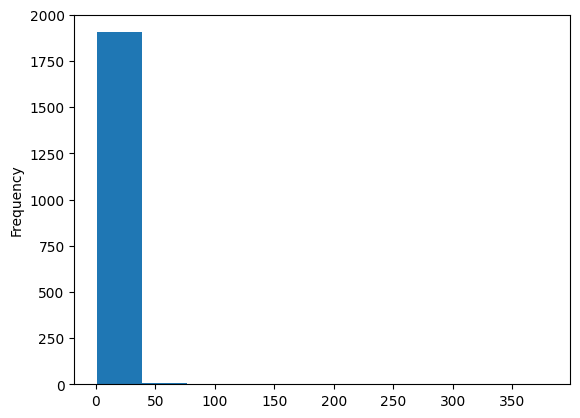

In [15]:
categorias = pd.DataFrame(" ".join(dataset['category']).split(),columns=['categorias'])
histograma = palavras.groupby('palavras').size()

print(" ".join(histograma.index))

print(histograma.shape)
histograma.plot.hist()

# Divide o modelo em treino e teste

In [18]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(dataset,encoded_category,test_size=0.3)

In [ ]:
ytrain

# Cria datasets de treino e teste no formato do tensorflow

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

batch_size = 32

# Conjunto de treino
tf_train = tf.data.Dataset.from_tensor_slices(
    (tf.cast(xtrain['sentence'].values, tf.string),
     tf.cast(ytrain, tf.float32)))
tf_train = tf_train.batch(batch_size)

# Conjunto de teste
tf_test = tf.data.Dataset.from_tensor_slices(
    (tf.cast(xtest['sentence'].values, tf.string),
     tf.cast(ytest, tf.float32)))
tf_test = tf_test.batch(batch_size)


In [24]:
vocab_size

1917

In [33]:
import tensorflow as tf
import string
import re

re.escape(string.punctuation)
#re.escape('samuel$@*é')

#tf.strings.regex_replace('samuel, é lindo; maravilhoso: pq?',[',',';'],"")

'!"\\#\\$%\\&\'\\(\\)\\*\\+,\\-\\./:;<=>\\?@\\[\\\\\\]\\^_`\\{\\|\\}\\~'

In [38]:
pp.tf_text_standardization("Samuel Rocha silva, é um gato! Ele AMA: animais, frutas, etc!")

<tf.Tensor: shape=(), dtype=string, numpy=b'samuel rocha silva \xc3\xa9 um gato ele ama animais frutas etc'>

In [36]:
# Model constants.
max_features = vocab_size
embedding_dim = 16
sequence_length = max_palavras

vectorize_layer = TextVectorization(
    standardize="lower_and_strip_punctuation",
    #standardize=custom_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length)

# Cria o modelo

In [44]:
from tensorflow.keras.layers import *

input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text')
x = vectorize_layer(input)
x = Embedding(max_features + 1, embedding_dim)(x)
x = Dropout(0.5)(x)

x = Conv1D(32, 3, padding="valid", activation="relu")(x)
x = Conv1D(32, 3, padding="valid", activation="relu")(x)
x = GlobalMaxPooling1D()(x)

x = Dense(16, activation="relu")(x)
x = Dropout(0.5)(x)

output = Dense(num_categorias, activation="sigmoid")(x)

model = tf.keras.Model(input, output)

# Compile the model with binary crossentropy loss and an adam optimizer.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Treina o modelo


In [45]:
epochs = 3

# Fit the model using the train and test datasets.
model.fit(tf_train,validation_data=tf_test,epochs=epochs)


Epoch 1/3


FailedPreconditionError: Graph execution error:

Detected at node 'model_5/text_vectorization_3/string_lookup_3/None_Lookup/LookupTableFindV2' defined at (most recent call last):
    File "e:\miniconda3\envs\nlp-env\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "e:\miniconda3\envs\nlp-env\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "e:\miniconda3\envs\nlp-env\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "e:\miniconda3\envs\nlp-env\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "e:\miniconda3\envs\nlp-env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sam-r\AppData\Local\Temp\ipykernel_2428\2830973281.py", line 4, in <cell line: 4>
      model.fit(tf_train,validation_data=tf_test,epochs=epochs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\layers\preprocessing\text_vectorization.py", line 610, in call
      lookup_data = self._lookup_layer(inputs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\layers\preprocessing\index_lookup.py", line 743, in call
      lookups = tf.ragged.map_flat_values(self._lookup_dense, inputs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\layers\preprocessing\index_lookup.py", line 781, in _lookup_dense
      lookups = self.lookup_table.lookup(inputs)
Node: 'model_5/text_vectorization_3/string_lookup_3/None_Lookup/LookupTableFindV2'
Detected at node 'model_5/text_vectorization_3/string_lookup_3/None_Lookup/LookupTableFindV2' defined at (most recent call last):
    File "e:\miniconda3\envs\nlp-env\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "e:\miniconda3\envs\nlp-env\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "e:\miniconda3\envs\nlp-env\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "e:\miniconda3\envs\nlp-env\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "e:\miniconda3\envs\nlp-env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sam-r\AppData\Local\Temp\ipykernel_2428\2830973281.py", line 4, in <cell line: 4>
      model.fit(tf_train,validation_data=tf_test,epochs=epochs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\layers\preprocessing\text_vectorization.py", line 610, in call
      lookup_data = self._lookup_layer(inputs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\layers\preprocessing\index_lookup.py", line 743, in call
      lookups = tf.ragged.map_flat_values(self._lookup_dense, inputs)
    File "e:\miniconda3\envs\nlp-env\lib\site-packages\keras\layers\preprocessing\index_lookup.py", line 781, in _lookup_dense
      lookups = self.lookup_table.lookup(inputs)
Node: 'model_5/text_vectorization_3/string_lookup_3/None_Lookup/LookupTableFindV2'
2 root error(s) found.
  (0) FAILED_PRECONDITION:  Table not initialized.
	 [[{{node model_5/text_vectorization_3/string_lookup_3/None_Lookup/LookupTableFindV2}}]]
	 [[model_5/text_vectorization_3/RaggedToTensor/RaggedTensorToTensor/_24]]
  (1) FAILED_PRECONDITION:  Table not initialized.
	 [[{{node model_5/text_vectorization_3/string_lookup_3/None_Lookup/LookupTableFindV2}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_7471]

In [3]:
acertos_apostador = [[3,"b"],[3,"a"],[1,"c"],[2,"d"]]

In [4]:
sorted(acertos_apostador)

[[1, 'c'], [2, 'd'], [3, 'a'], [3, 'b']]

# Testes

In [11]:
import pandas as pd
import preprocessing as pp

dataset = pd.read_csv('dataset.csv')

#dataset.head(20)

text = pp.tf_text_standardization(dataset['sentence'])
#print([x.decode() for x in text.numpy()])

stats = pp.tf_text_statistics(text)

df_stats = pd.DataFrame(stats['vocab_freq'],index=decode_strings(stats['vocab']),columns=['freq'])


In [23]:
df_stats.loc['reforma']

freq    1
Name: reforma, dtype: int32

In [15]:
for x in df_stats.index:
    if 'port' in x:
        print(x)

portuguÊs
porta
porte
transportes
importante
portuguesa
esportividade
portal
exportadora
porto
importância


In [26]:
df_stats.sort_values('freq').tail(50)


,freq
valor,11
municipal,11
brasil,11
processo,11
suas,11
crédito,12
chevrolet,12
até,12
inscrições,12
2021,12


In [10]:
def decode_strings(text):
    return [x.decode() for x in text.numpy()]

In [8]:
decode_strings(stats['vocab'])

['auxílio', 'doença', 'previdenciário', 'benefícios', 'em', 'espécie', 'e', 'direito', 'pagar', 'todas', 'as', 'contas', 'atraso', 'r129090', 'então', 'encontraremos', 'na', 'próxima', 'aula', 'veja', 'os', 'resultados', 'da', 'categoria', 'de', 'ofertas', 'do', 'novo', 'modelo', 'nissan', 'kicks', 'além', 'disso', 'a', 'embalagem', 'é', 'reutilizável', '100', 'reciclável', 'ead', 'educação', 'distância', 'você', 'tem', 'autonomia', 'para', 'organizar', 'seus', 'estudos', 'condições', 'compra', 'pensão', 'por', 'morte', 'art', '749', 'previdenciÁrio', 'primeira', 'agência', 'foi', 'aberta', '2', 'janeiro', '1945', 'localizada', 'sede', 'banco', 'valor', 'das', 'parcelas', 'lojas', 'sapatos', 'seu', 'carrinho', 'compras', 'ainda', 'está', 'vazio', 'sale', 'até', '50', 'off', 'mais', 'creme', 'mãos', 'r990', 'nas', 'acima', 'r12990', 'brk', 'ambiental', 'responsável', 'pela', 'gestão', 'dos', 'serviços', 'esgoto', 'rio', 'ostras', 'tribunal', 'regional', 'trabalho', '15ª', 'regiÃo', 'edi